# NMF en TwentyNewsGroups

Código basado en:

https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

Fue modificado para ver ejemplos interesantes

In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from helper import plot_top_words

In [3]:
n_samples = 5000
n_features = 1000
n_components = 20
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [4]:
print("Cargando dataset...")
t0 = time()
TNG_train = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
)
data_samples = TNG_train["data"][:n_samples]
data_labels = [TNG_train["target_names"][idx] for idx in TNG_train["target"][:n_samples]]
print("done in %0.3fs." % (time() - t0))

Cargando dataset...
done in 7.593s.


In [5]:
idx = 23
print(data_samples[idx])
print("------------------------------------")
print("Label: ", data_labels[idx])





"Put not your trust in princes" is the Biblical proverb.  The modern
analog is governments.  At the time of the founding of the US, the
idea that citizens had rights above those of the government was not
that common, but was explicit in the writings of the founders.  To a
considerable extent, Englishmen also had those rights.

Yes, times change, and technology changes.  The possibility of 
a few governments enserfing all of mankind was not possible until
quite recently.  In the feudal system, the lord was almost as
restricted as the serfs, so having the people enserf themselves
does not make anything better; most feudal lords, and even most
slaveowners, did not mistreat those under them.

Freedom of speech and freedom of religion are under real attack NOW.

------------------------------------
Label:  talk.politics.guns


In [8]:
print("Extrayendo el vector de cuentas...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extrayendo el vector de cuentas...
done in 3.325s.


In [9]:
t0 = time()
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

done in 30.006s.


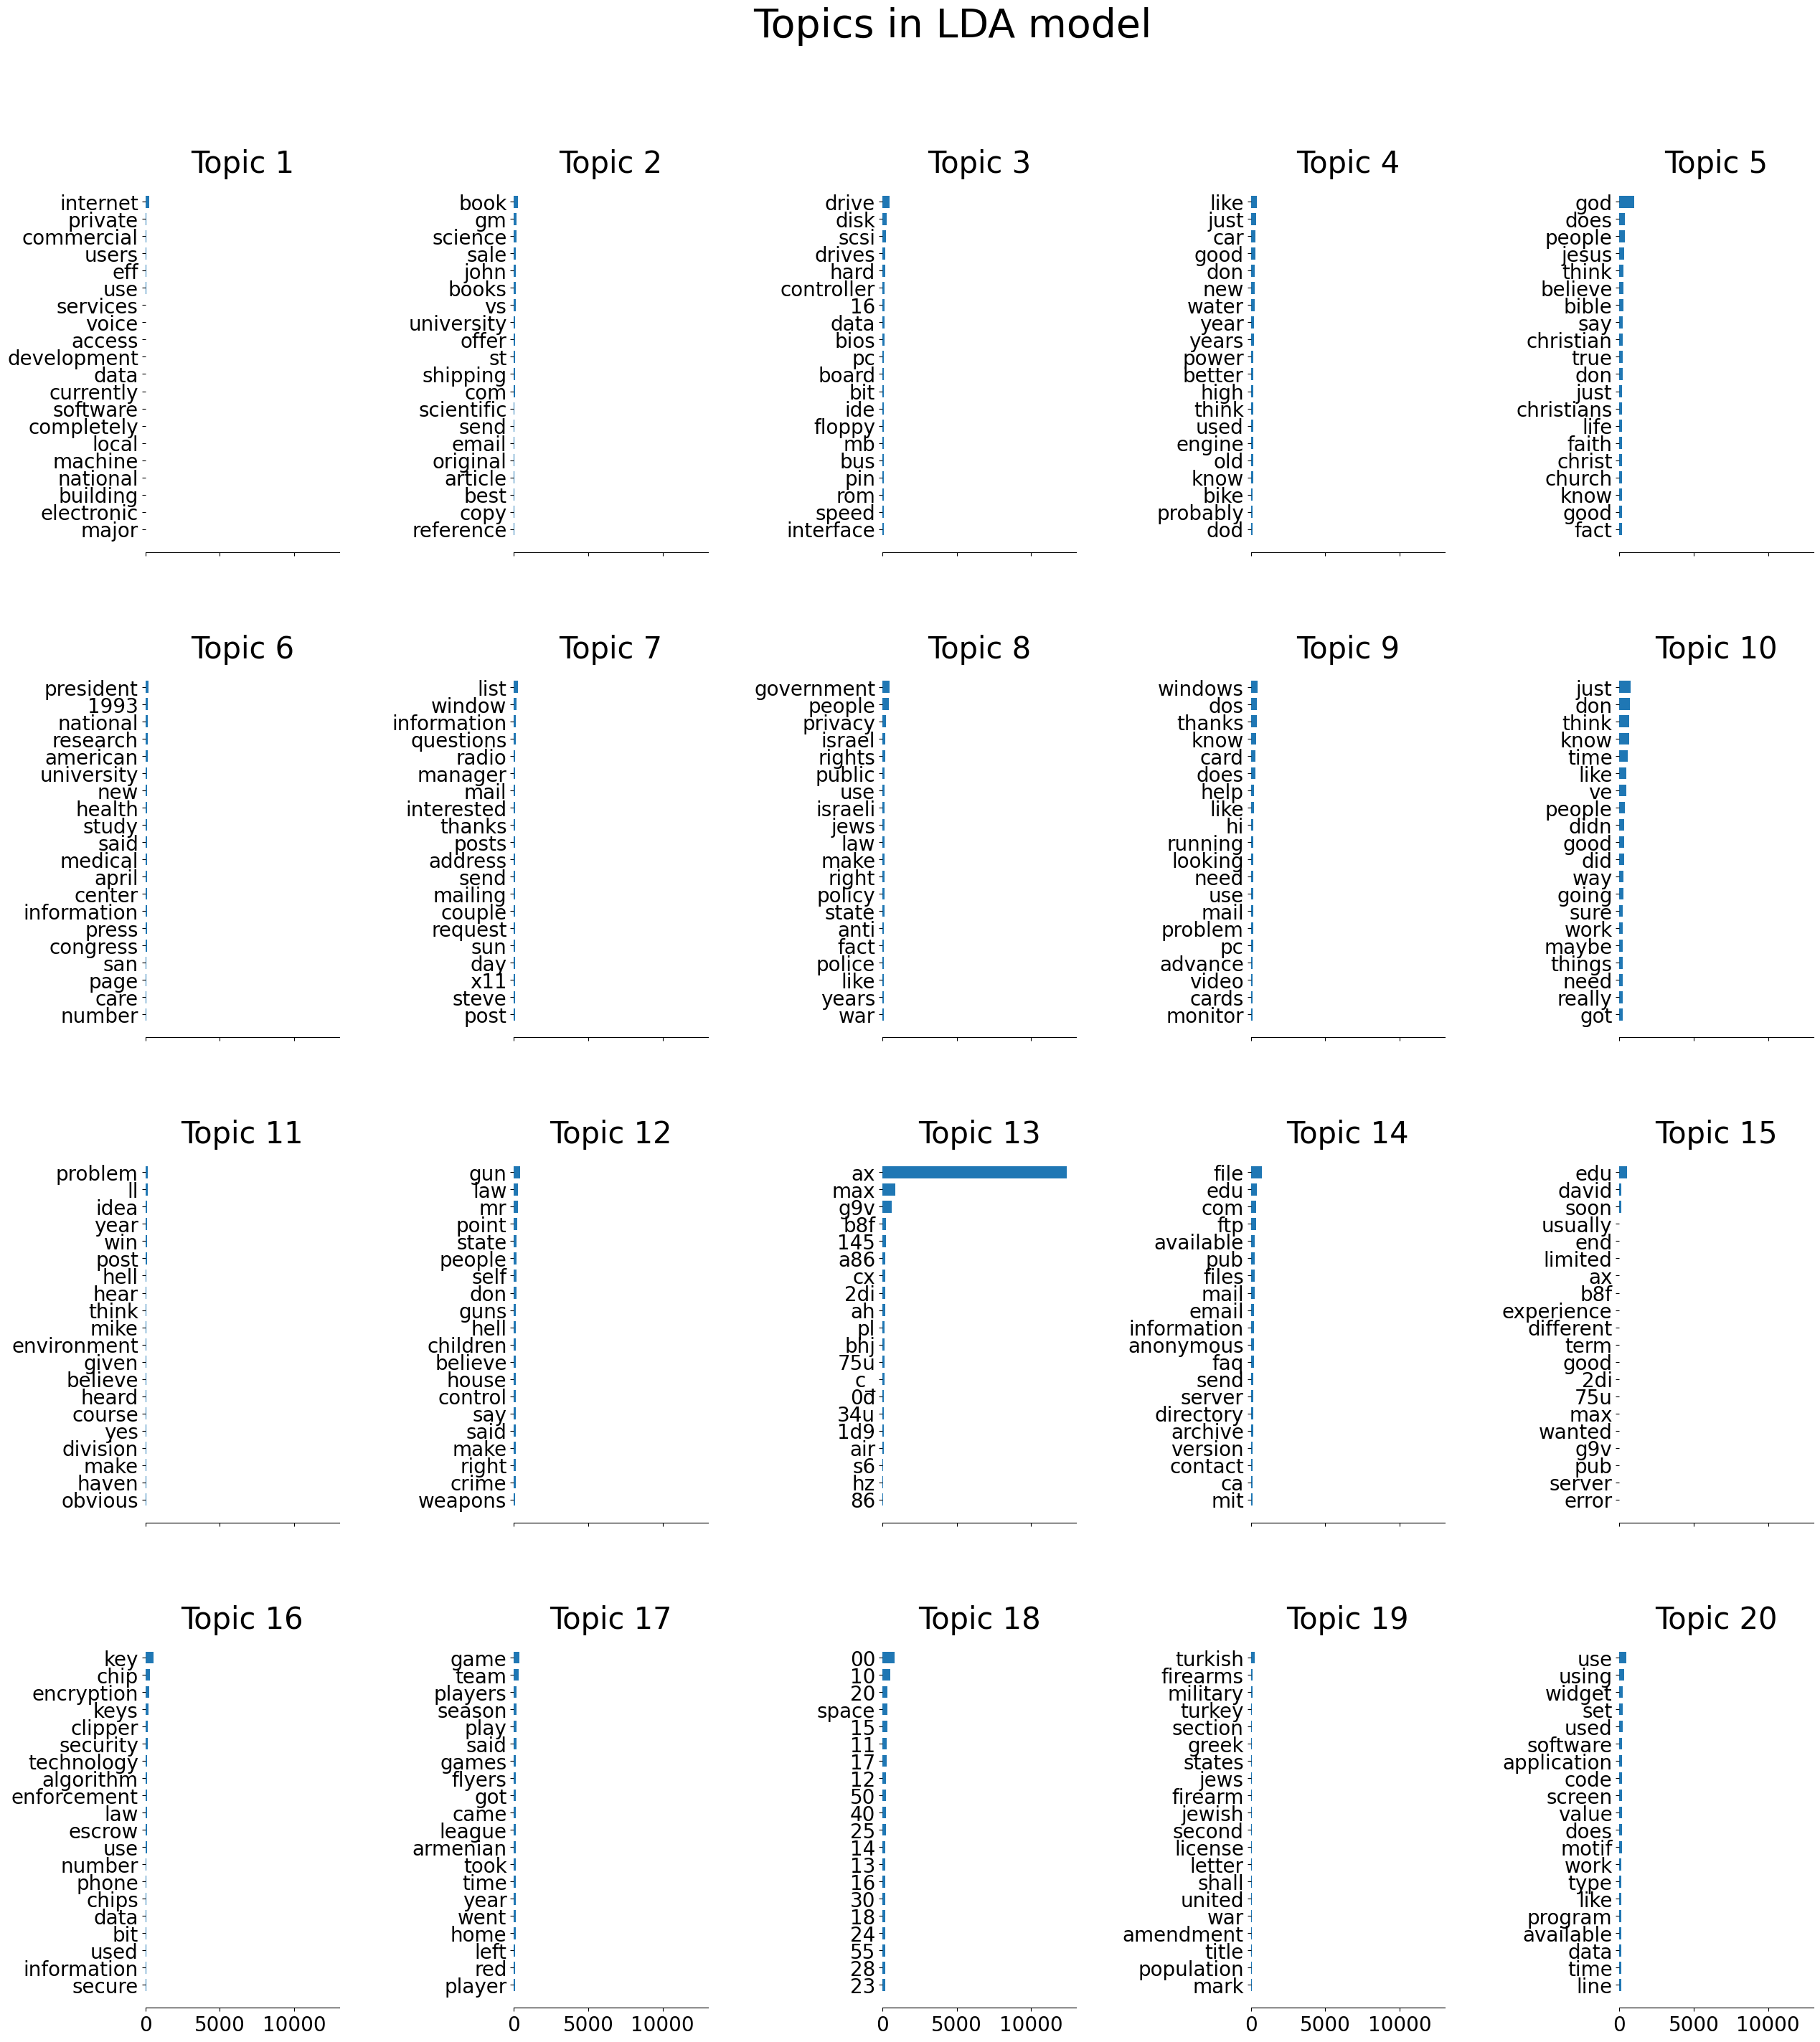

In [10]:
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    lda, tf_feature_names, n_top_words, "Topics in LDA model"
)

In [12]:
X = lda.transform(tf)

In [13]:
X.shape

(5000, 20)

In [14]:
X[0]

array([0.00172414, 0.00172414, 0.00172414, 0.00172414, 0.00172414,
       0.00172414, 0.00172414, 0.27313476, 0.00172414, 0.21861806,
       0.00172414, 0.39739675, 0.00172414, 0.00172414, 0.00172414,
       0.00172414, 0.00172414, 0.00172414, 0.08326422, 0.00172414])

In [39]:
# Recupero los documentos que tienen como máximo tópico el {idx}
idx = 8
x = np.array(data_labels)[X.argmax(axis = 1) == idx]

In [72]:
df = pd.DataFrame(zip(data_samples,data_labels, *(X.argsort(axis=1)[:,::-1].T+1)), columns=["Texto", "Label", *[f'T{n}' for n in range(20)]])

In [77]:
df.query('T0 == 3').Label.value_counts()

Label
comp.sys.ibm.pc.hardware    48
comp.sys.mac.hardware       26
misc.forsale                15
sci.electronics             11
comp.graphics                2
rec.motorcycles              2
rec.autos                    1
sci.space                    1
talk.politics.guns           1
sci.crypt                    1
Name: count, dtype: int64